Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions)
Plot your data. For tabular data, you will need to run scatters, for image data, you will need to plot your example classes.
How will you preprocess your data? You should explain this in your README.md file and link your Jupyter notebook to it. All code and  Jupyter notebooks have be uploaded to your repo.
You must also include in your Jupyter Notebook, a link for data download and environment setup requirements:
              !wget !unzip like functions as well as !pip install functions for non standard libraries not available in colab are required to be in the top section of your jupyter lab notebook. Or having the data on GitHub (you will need the academic license for GitHub to do this, larger datasets will require a link to external storage).

In [1]:
#!python3.11 -m pip install --upgrade pip

In [2]:
#!pip install scikit-learn
#!pip install keras
#!pip install tensorflow

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

--2024-07-20 03:19:14--  https://raw.githubusercontent.com/JasonMorris1/CSE151_Tesla_Stock_Prediction/main/tsla_2014_2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 751920 (734K) [text/plain]
Saving to: ‘tsla_2014_2023.csv.1’

tsla_2014_2023.csv. 100%[===================>] 734.30K  3.73MB/s    in 0.2s    

2024-07-20 03:19:14 (3.73 MB/s) - ‘tsla_2014_2023.csv.1’ saved [751920/751920]



Text(0, 0.5, 'Tesla Stock Price')

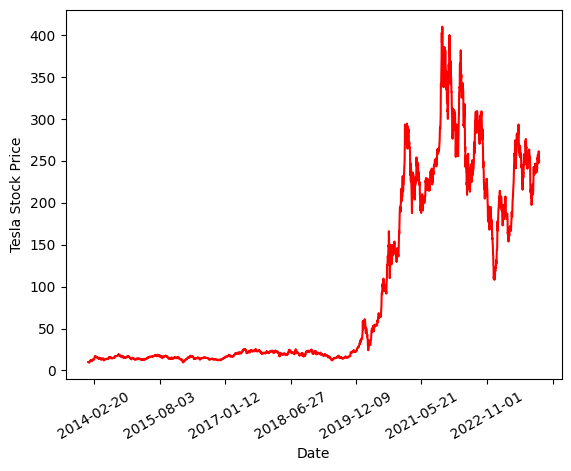

In [ ]:
!wget https://raw.githubusercontent.com/JasonMorris1/CSE151_Tesla_Stock_Prediction/main/tsla_2014_2023.csv
df = pd.read_csv('tsla_2014_2023.csv')
df.describe()

rule = rrulewrapper(YEARLY, interval=1)
loc = RRuleLocator(rule)
fig, ax = plt.subplots()

plt.plot(df['date'], df['close'], markersize=2, color='red')
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.xlabel('Date')
plt.ylabel('Tesla Stock Price')

In [ ]:
df.head(-5)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2023-12-15,251.210007,254.130005,248.300003,253.500000,135720800,72.974908,63.524202,139.301713,195.527619,233.397000,237.632154,241.917900,236.885797,4.093528,240.367500,5.830002,8.900813,9.278673,252.080002
2507,2023-12-18,253.779999,258.739990,251.360001,252.080002,116416500,68.947320,61.939266,104.933606,169.893487,233.228000,238.198736,241.881600,237.186672,4.535486,241.256500,7.379989,8.683552,9.143052,257.220001
2508,2023-12-19,253.479996,258.339996,253.009995,257.220001,106737400,74.816853,65.312918,89.766663,158.884036,233.179000,238.944668,241.789400,237.583371,5.240090,242.337500,6.259994,8.337329,8.937120,247.139999
2509,2023-12-20,256.410004,259.839996,247.000000,247.139999,125097000,52.229524,55.014259,35.554354,81.428398,232.849400,239.266054,241.586500,237.772612,4.928312,242.634500,12.839996,8.980568,9.215896,254.500000


# Column descriptions:


*   Date: This describes the date the data is associated with, which is important because stocks are time series data.
*   Open/High/Low/Close: These columns describe the stock price at market open, market close, the highest price for the day, and the lowest price for the day. These are typically used to generate candlestick charts. For our purposes, we will only focus on the close price and use it as a factor in predicting the next day's close price. So, we will drop the open, high, and low columns.
* Volume describes the quantity of shares traded in a day. This may be a useful factor in predicting the stock's movement tomorrow.
* RSI stands for relative strength index and is a popular momentum oscillator in technical analysis. It represents whether a stock is "overbought" (RSI > 70) or "oversold" (RSI < 30). This can be useful in predicting future price movements. Since they are so similar, we will likely drop one of the 2 RSI columns.
* CCI stands for Commodity Channel Index and it measures the current price level relative to an average price level over a given period of time. It can be helpful in predicting price corrections in the future. Because they are so similar, we will probably drop one of the 2 CCI columns.
* SMA and EMA stand for simple and exponential moving averages. A simple moving average is the equally weighted average price of a stock over a given period of previous days. An exponential moving average is similar, but assigns higher weight to more recent days. Because they are so similar in practice, we will likely only keep one out of the 4 SMA/EMA columns.
* MACD stands for Moving Average Convergence/Divergence and is a technical indicator representing the difference between 2 moving averages (usually over the 12 and 26 periods). We hope it will be a useful feature in our model.
* Bollinger bands are based on 2 standard deviations above and below a moving average in price. In this dataset, this represents the lower band (i.e. 2 standard deviations below the recent moving average). The next column, TrueRange, represents the area "within" the band, with bollinger+TrueRange giving us the value of the upper Bollinger band. We will explore how these variables relate to themselves and others to see what the best way to handle them would be in our model.
* ATR stands for Average True Range and is a measure of volatility based on the past 7 or 14 day periods. We will likely keep only 1 column because of how similar these are.
* next_day_close represents the close price of the stock the next day. This is the value that we want to predict and so it will not be passed into the model's training or testing X values



In [ ]:
df['bollinger_upper'] = df['bollinger'] + df['TrueRange']
df = df.drop(columns=['open', 'high', 'low'])
df.head(-5)

,date,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,bollinger_upper
0,2014-01-02,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667,10.136133
1,2014-01-03,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000,10.015500
2,2014-01-06,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,10.141900
3,2014-01-07,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,10.181234
4,2014-01-08,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333,10.199501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2023-12-15,253.500000,135720800,72.974908,63.524202,139.301713,195.527619,233.397000,237.632154,241.917900,236.885797,4.093528,240.367500,5.830002,8.900813,9.278673,252.080002,246.197502
2507,2023-12-18,252.080002,116416500,68.947320,61.939266,104.933606,169.893487,233.228000,238.198736,241.881600,237.186672,4.535486,241.256500,7.379989,8.683552,9.143052,257.220001,248.636489
2508,2023-12-19,257.220001,106737400,74.816853,65.312918,89.766663,158.884036,233.179000,238.944668,241.789400,237.583371,5.240090,242.337500,6.259994,8.337329,8.937120,247.139999,248.597494
2509,2023-12-20,247.139999,125097000,52.229524,55.014259,35.554354,81.428398,232.849400,239.266054,241.586500,237.772612,4.928312,242.634500,12.839996,8.980568,9.215896,254.500000,255.474496


In [ ]:
df.describe()

,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,bollinger_upper
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,94.072491,1.131986e+08,53.058382,52.862457,9.809933,13.202457,91.810735,91.806751,89.542873,89.547927,0.647230,93.162246,4.699351,4.680234,4.656461,94.167250,97.861597
std,108.500301,7.547433e+07,18.239752,13.352063,100.975002,109.285239,106.581797,106.094893,104.809940,103.979872,6.325994,107.718086,6.581929,5.858869,5.762082,108.530957,113.332131
min,9.289333,1.062000e+07,6.395305,16.564126,-233.333333,-297.930166,9.490973,9.813725,10.494240,9.674284,-25.271333,9.740800,0.135334,0.257427,0.315794,9.289333,10.015500
25%,15.814167,6.643185e+07,39.859440,43.595435,-76.876737,-78.543937,15.496080,15.446697,15.356488,15.594446,-0.392822,15.733792,0.496333,0.569335,0.577166,15.822167,16.308293
50%,21.877667,9.320775e+07,53.226417,51.621434,19.823624,24.702835,21.563733,21.575870,21.106043,21.195890,0.098391,21.859567,0.894001,0.833601,0.805047,21.881334,22.697600
75%,200.049999,1.323710e+08,65.900330,61.937068,94.426550,99.180514,192.341650,196.465729,194.728575,194.154595,1.094057,199.300335,7.700836,9.021824,9.291728,200.844997,207.718630
max,409.970001,9.140820e+08,97.460910,94.197983,233.333333,350.643337,357.870532,344.030730,330.935132,321.063884,38.067930,373.152498,54.326660,24.512656,22.793229,409.970001,410.652327


In [ ]:
df.shape

(2516, 18)

In [ ]:
for c in df.columns:
    c = df[[c]]
    print(c.isna().sum())
#someone else can fstring and clean up output

date    0
dtype: int64
close    0
dtype: int64
volume    0
dtype: int64
rsi_7    0
dtype: int64
rsi_14    0
dtype: int64
cci_7    0
dtype: int64
cci_14    0
dtype: int64
sma_50    0
dtype: int64
ema_50    0
dtype: int64
sma_100    0
dtype: int64
ema_100    0
dtype: int64
macd    0
dtype: int64
bollinger    0
dtype: int64
TrueRange    0
dtype: int64
atr_7    0
dtype: int64
atr_14    0
dtype: int64
next_day_close    0
dtype: int64
bollinger_upper    0
dtype: int64


# Observations
* Based on the count row, we see that the dataset has 2516 rows of data. In the case of dates, this translates to 2516 days, or 6.8885740296 years. This is good for us, because it will allow us to use approximately 5 years of stock data for training later on, and a little more than 1.5 years as test data.
* Based on our loop above, we see that we have a complete dataset with no nan values. This will be useful for continuity of train/test data and help us going forward.
* Another observation is that we have consistency in data types, with all numeric values being `int64`. This will be good for us going forward because we don't need to convert datatypes.

In [ ]:
#sns.pairplot(df, diag_kind='kde')

# Data Distributions

It looks our data has a fair mix of normal and bimodally distributed values.
*   Close prices are bimodally distributed, which is a little surprising for a stock as volatile as TSLA
*   Volume looks like to close to normally distributed with a right skew. This makes sense, with average volumes, and days with extremely large volumes being outliers
* RSI appears to be normally distributed, while CCI is bimodal. This may mean that they will affect our model differently, which will be helpful.
* The SMA and EMA graphs look similarly bimodal, justifying our decision to use only one of the 4. They look similar to the close price chart, which is no surprise because it represents a moving average of close prices.
* MACD is normally distributed with very small standard deviations. Because of the small standard deviations, we may want to normalize it later on.
* Bollinger bands, like SMA/EMA, is bimodal and looks similar to close prices.
* TrueRange, on the other hand, is normally distributed with a right skew.
* ATR, like other price-based indicators, is bimodally distributed with a similar shape to the close prices.

<Axes: >

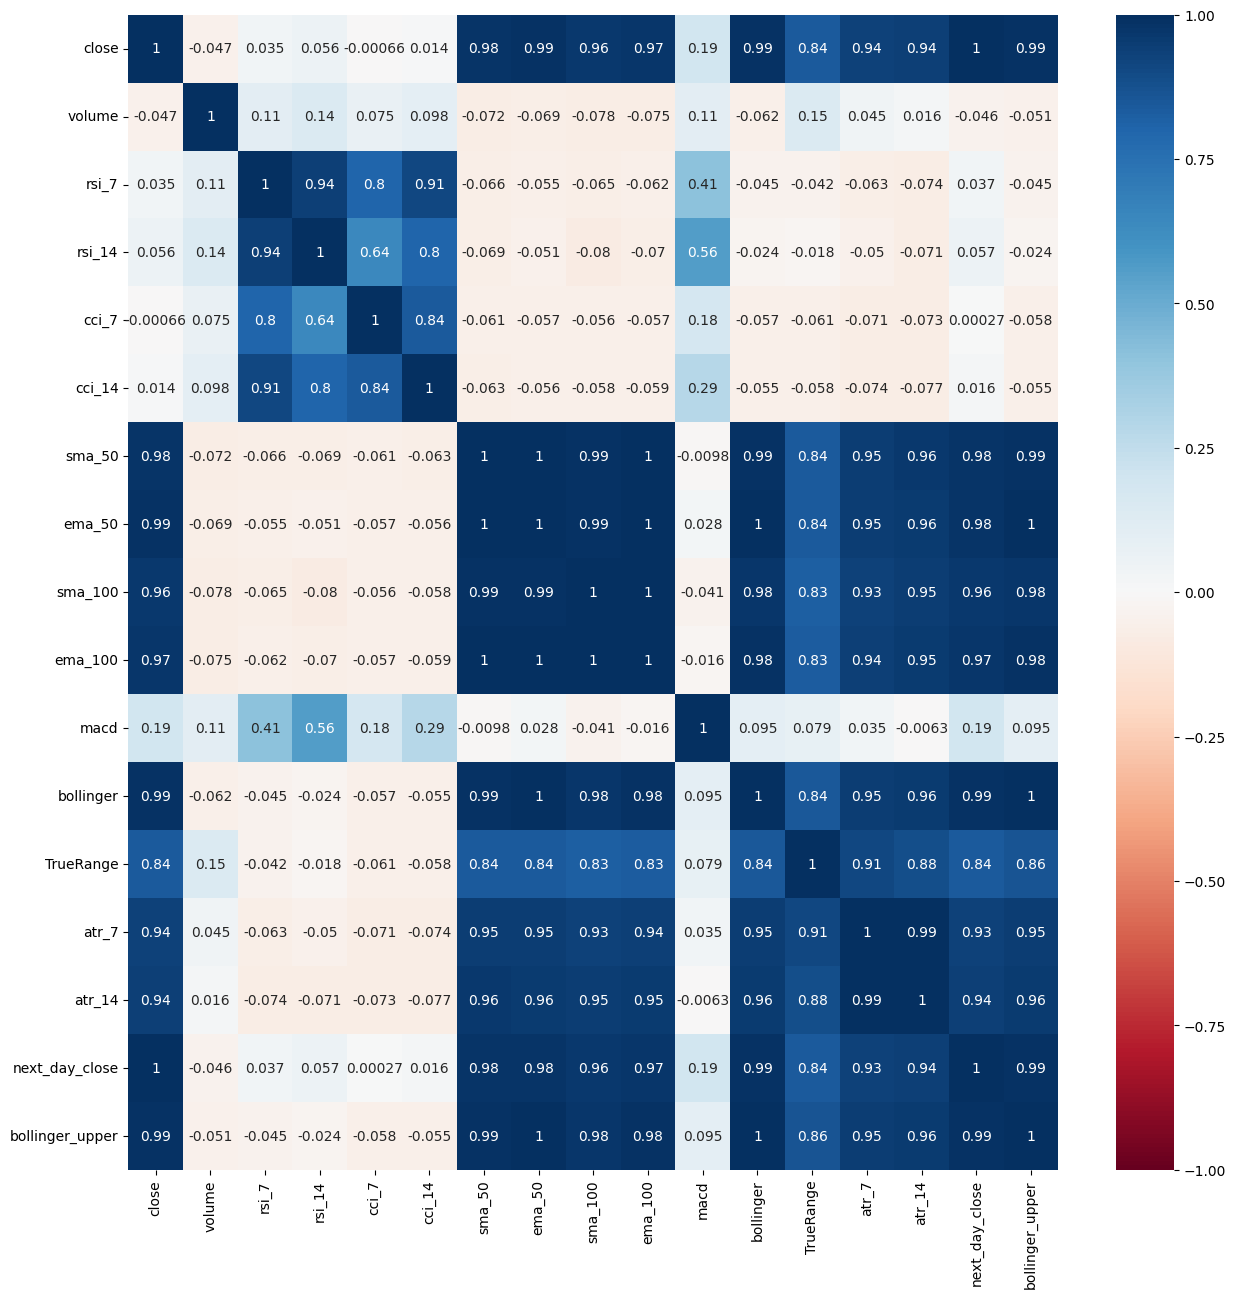

In [ ]:
corr = df.drop(columns="date").corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [ ]:
df = df.drop(columns=['sma_50', 'sma_100', 'rsi_7', 'ema_50', 'atr_7'])
df

,date,close,volume,rsi_14,cci_7,cci_14,ema_100,macd,bollinger,TrueRange,atr_14,next_day_close,bollinger_upper
0,2014-01-02,10.006667,92826000,54.440118,-37.373644,15.213422,9.674284,0.169472,9.740800,0.395333,0.447550,9.970667,10.136133
1,2014-01-03,9.970667,70425000,53.821521,-81.304471,17.481130,9.680190,0.162623,9.776167,0.239333,0.432677,9.800000,10.015500
2,2014-01-06,9.800000,80416500,50.870410,-123.427544,-37.824708,9.682577,0.141790,9.797900,0.344000,0.426343,9.957333,10.141900
3,2014-01-07,9.957333,75511500,53.406750,-84.784651,-20.779431,9.688051,0.136402,9.837900,0.343334,0.420414,10.085333,10.181234
4,2014-01-08,10.085333,92448000,55.423026,60.799662,43.570559,9.695964,0.140837,9.870167,0.329334,0.413908,9.835333,10.199501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,252.539993,93249800,58.137456,50.821325,80.672033,238.389711,5.223831,244.503500,6.850006,8.943707,256.609985,251.353506
2512,2023-12-26,256.609985,86892400,60.824035,93.909968,86.446838,238.750509,5.495890,245.529999,5.430008,8.692729,261.440002,250.960007
2513,2023-12-27,261.440002,106494400,63.793639,171.938770,119.554558,239.199806,6.031711,246.265999,6.730011,8.552535,253.179993,252.996010
2514,2023-12-28,253.179993,113619900,55.978816,45.772983,73.958135,239.476641,5.723858,246.717998,12.419998,8.828782,248.479996,259.137996


<Axes: >

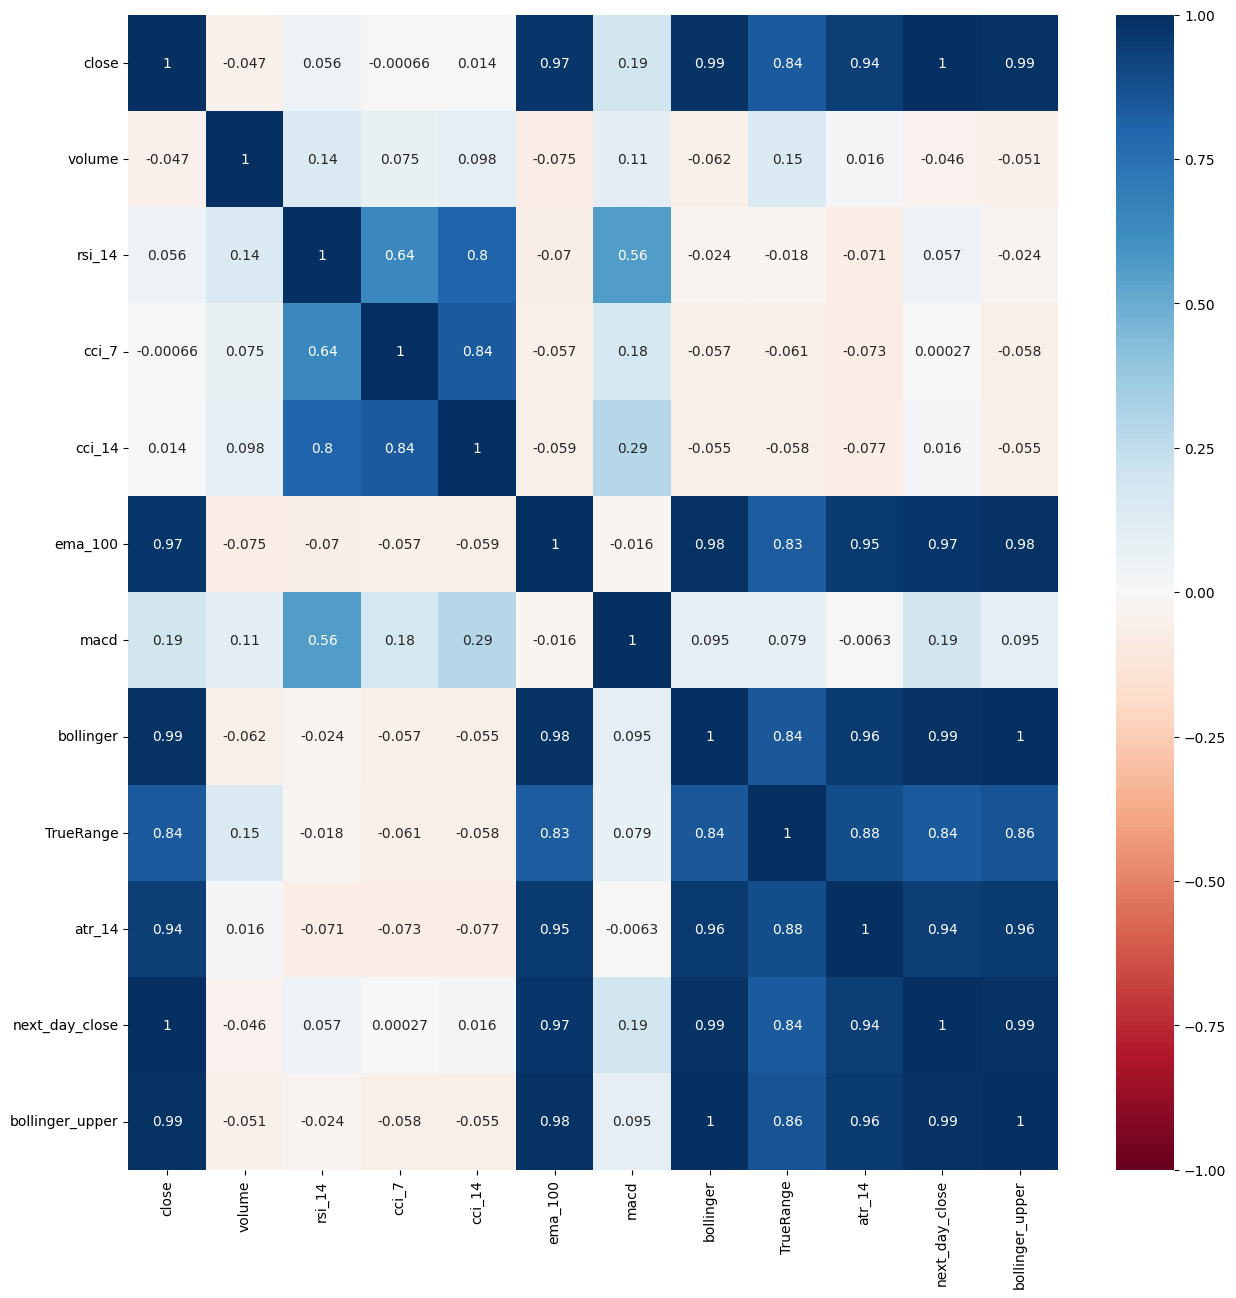

In [ ]:
corr = df.drop(columns="date").corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

Based on the results, it looks like bollinger_upper is very close to the normal bollinger column, and so we will drop it. Additionally, it looks like cci_7 and cci_14 are very close to each other. We will drop cci_14 and keep cci_7 to avoid an endogenous variables situation. Note that 3 out of the 4 SMA/EMA columns and atr_7 were dropped for the same reason.

<Axes: >

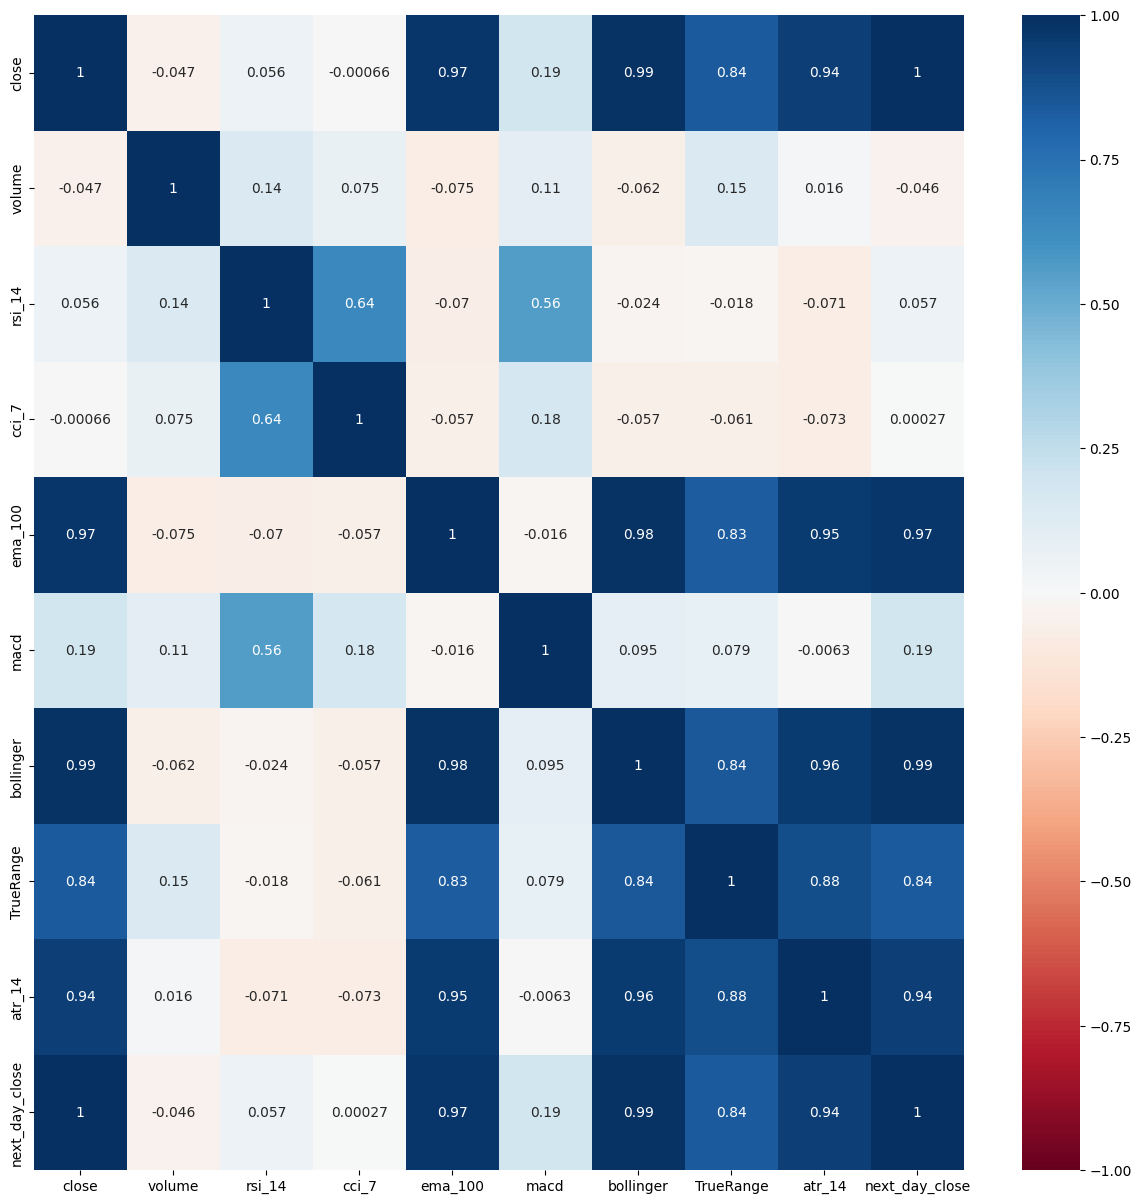

In [ ]:
df = df.drop(columns=['bollinger_upper', 'cci_14'])

corr = df.drop(columns="date").corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

# Work below is now for milestone 3

In [ ]:
df.describe()

,close,volume,rsi_14,cci_7,ema_100,macd,bollinger,TrueRange,atr_14,next_day_close
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,94.072491,1.131986e+08,52.862457,9.809933,89.547927,0.647230,93.162246,4.699351,4.656461,94.167250
std,108.500301,7.547433e+07,13.352063,100.975002,103.979872,6.325994,107.718086,6.581929,5.762082,108.530957
min,9.289333,1.062000e+07,16.564126,-233.333333,9.674284,-25.271333,9.740800,0.135334,0.315794,9.289333
25%,15.814167,6.643185e+07,43.595435,-76.876737,15.594446,-0.392822,15.733792,0.496333,0.577166,15.822167
50%,21.877667,9.320775e+07,51.621434,19.823624,21.195890,0.098391,21.859567,0.894001,0.805047,21.881334
75%,200.049999,1.323710e+08,61.937068,94.426550,194.154595,1.094057,199.300335,7.700836,9.291728,200.844997
max,409.970001,9.140820e+08,94.197983,233.333333,321.063884,38.067930,373.152498,54.326660,22.793229,409.970001


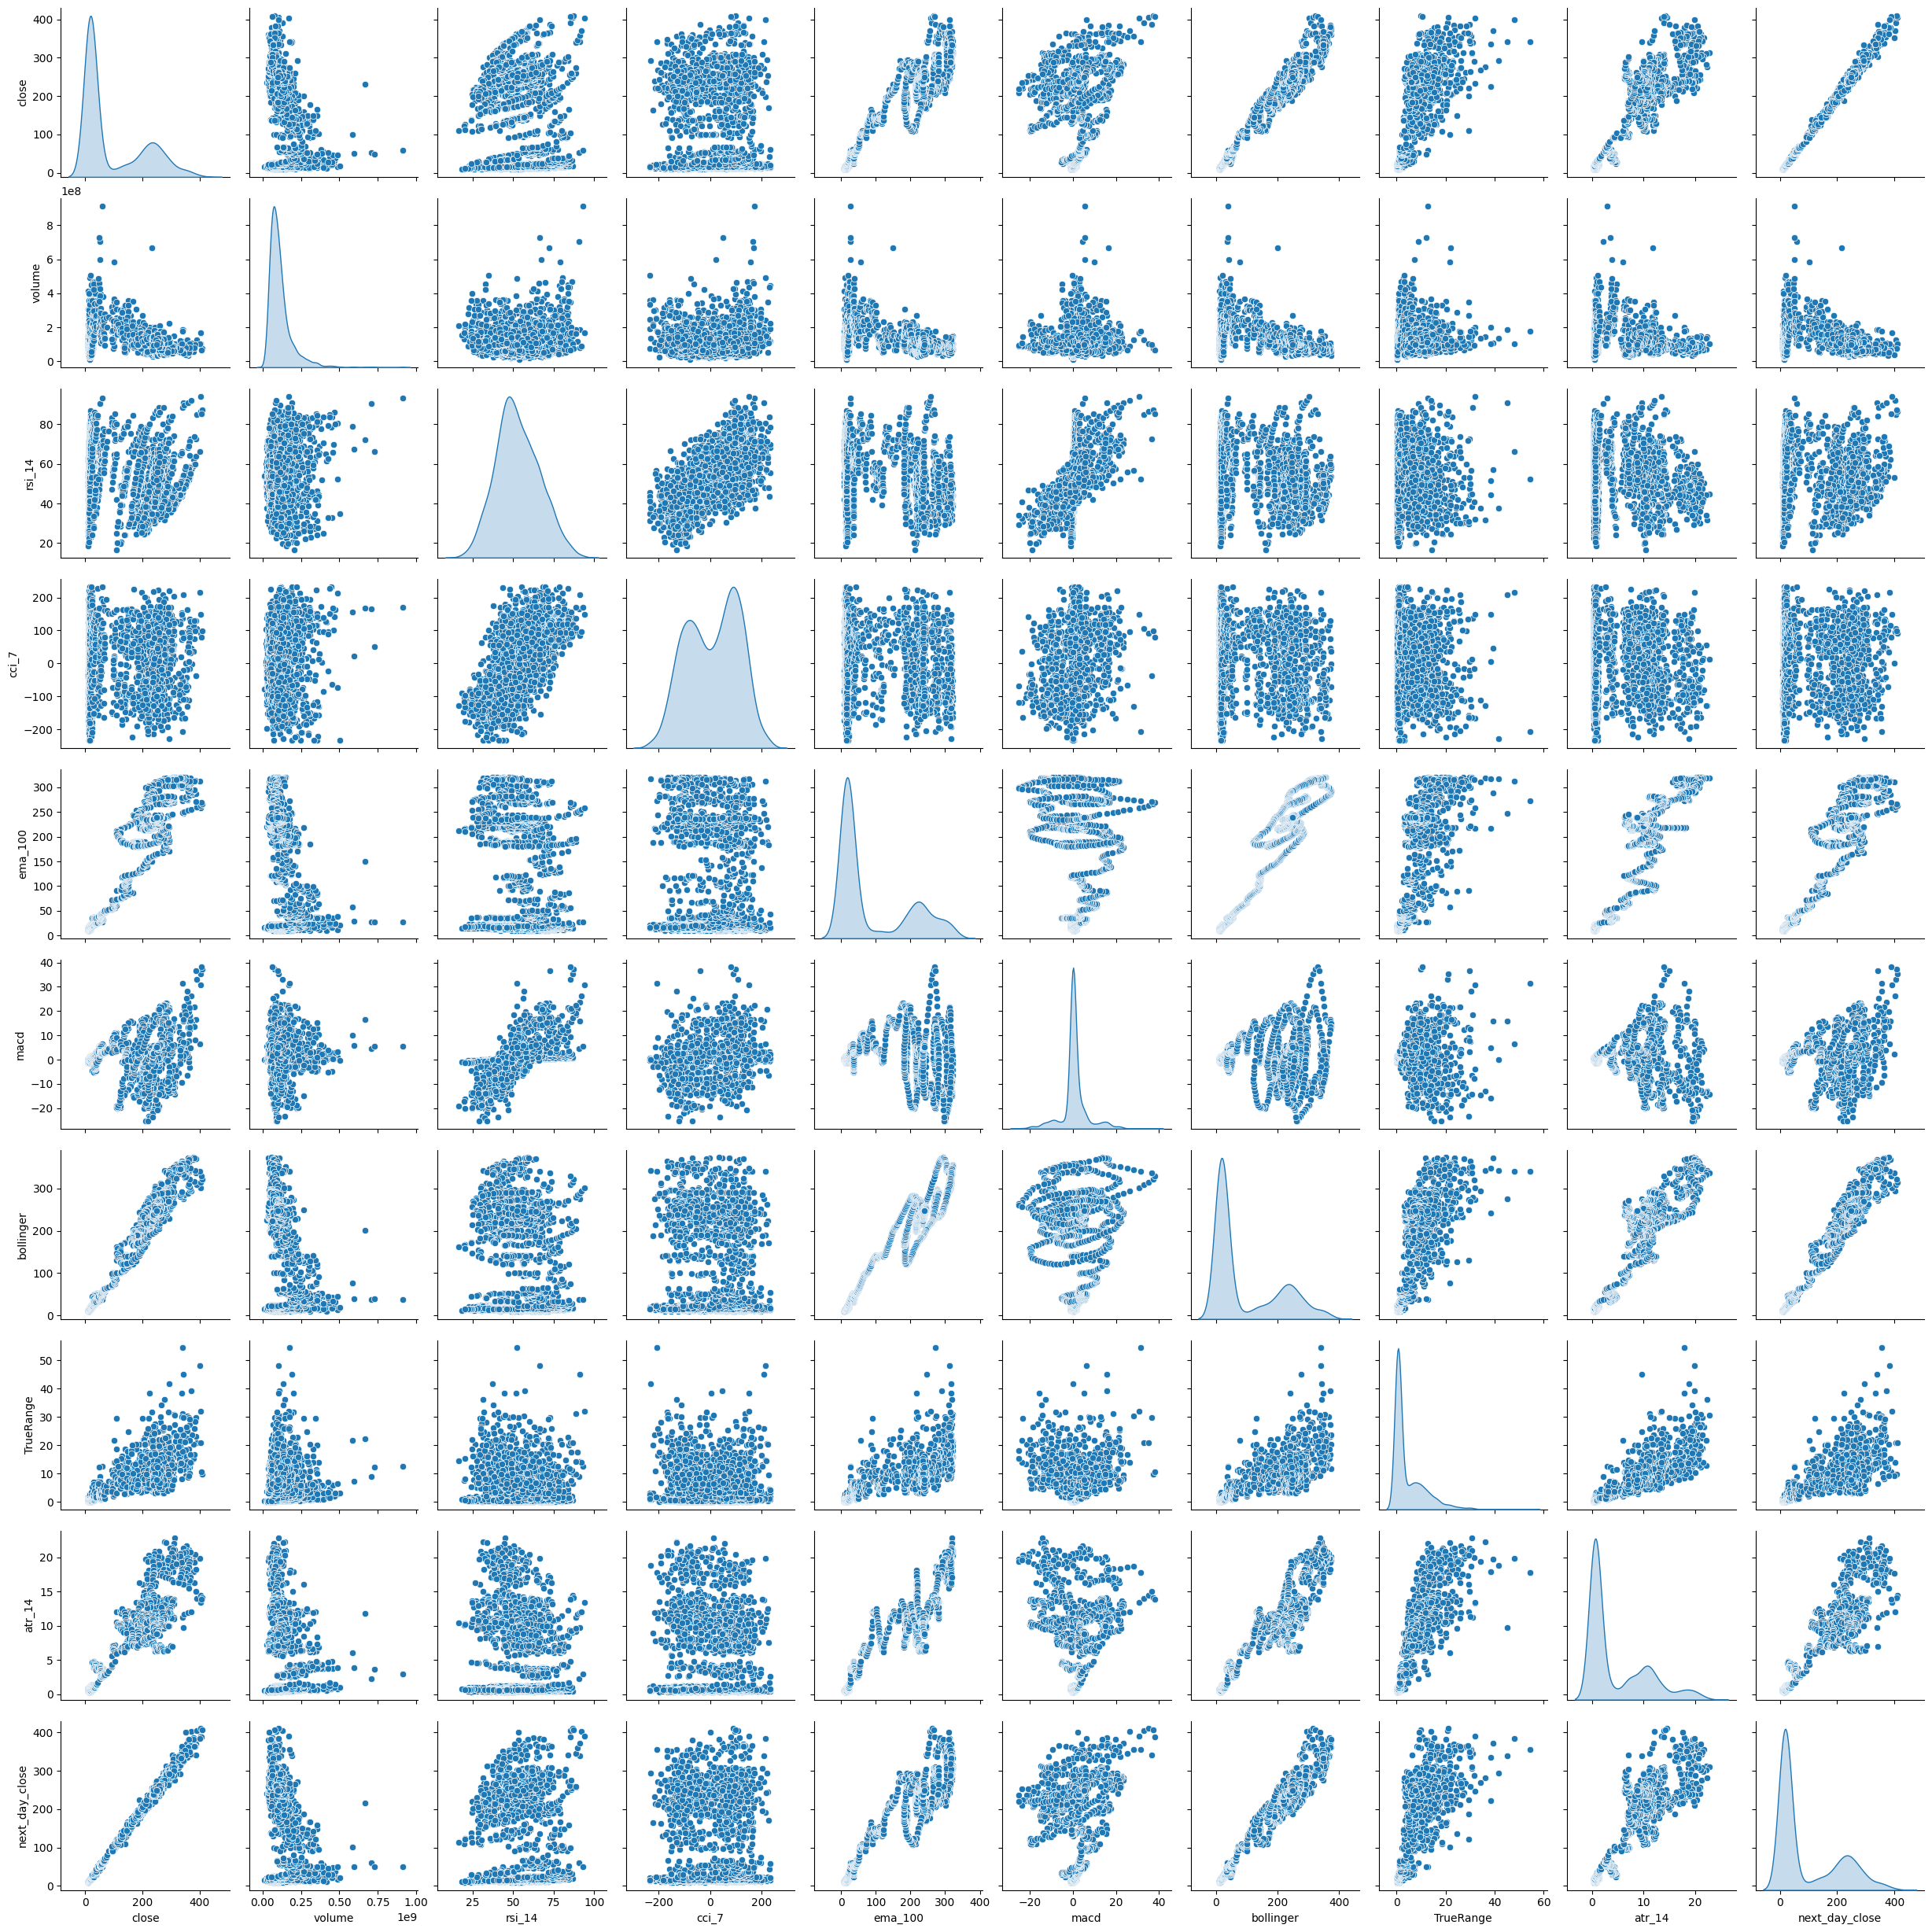

In [ ]:
sns.pairplot(df, diag_kind='kde')

It looks like volume might be a good candidate for standardization, because the main value it provides in terms of technical analysis is whether the volume is above average or below average. Additionally, the raw volume numbers are much higher than the rest of our numerical values, although it is not much more important than other features. We will first take a log to smoothen the output and then use z-scores for volume because that better represents our purpose for including it as a feature.

In [ ]:
df['volume'] = np.log(df['volume'])
df['volume'] = (df['volume'] - df['volume'].mean())/df['volume'].std()
df.describe()

,close,volume,rsi_14,cci_7,ema_100,macd,bollinger,TrueRange,atr_14,next_day_close
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,94.072491,-1.581494e-16,52.862457,9.809933,89.547927,0.647230,93.162246,4.699351,4.656461,94.167250
std,108.500301,1.000000e+00,13.352063,100.975002,103.979872,6.325994,107.718086,6.581929,5.762082,108.530957
min,9.289333,-4.023546e+00,16.564126,-233.333333,9.674284,-25.271333,9.740800,0.135334,0.315794,9.289333
25%,15.814167,-6.783789e-01,43.595435,-76.876737,15.594446,-0.392822,15.733792,0.496333,0.577166,15.822167
50%,21.877667,-6.049316e-02,51.621434,19.823624,21.195890,0.098391,21.859567,0.894001,0.805047,21.881334
75%,200.049999,5.795125e-01,61.937068,94.426550,194.154595,1.094057,199.300335,7.700836,9.291728,200.844997
max,409.970001,4.105078e+00,94.197983,233.333333,321.063884,38.067930,373.152498,54.326660,22.793229,409.970001


In [ ]:
sns.pairplot(df, diag_kind='kde')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fb7d669f130> (for post_execute):


KeyboardInterrupt: 

Now we calculate the difference between `next_day_close` and `close` and then encode it as 0 or 1. We will add a 0 if the price difference was negative (i.e. the stock price went down the next day) and 1 if the price difference is positive (i.e. the stock price went up the next day).

In [ ]:
df['next_day_close_binary'].values

KeyError: 'next_day_close_binary'

In [ ]:
df['next_day_close_binary'] = df['next_day_close'] - df['close']

df['next_day_close_binary'] = df['next_day_close_binary'].apply(lambda x: 0 if x <= 0 else 1)

df.head(-5)

,date,close,volume,rsi_14,cci_7,ema_100,macd,bollinger,TrueRange,atr_14,next_day_close,next_day_close_binary
0,2014-01-02,10.006667,-0.067981,54.440118,-37.373644,9.674284,0.169472,9.740800,0.395333,0.447550,9.970667,0
1,2014-01-03,9.970667,-0.571878,53.821521,-81.304471,9.680190,0.162623,9.776167,0.239333,0.432677,9.800000,0
2,2014-01-06,9.800000,-0.329815,50.870410,-123.427544,9.682577,0.141790,9.797900,0.344000,0.426343,9.957333,1
3,2014-01-07,9.957333,-0.444641,53.406750,-84.784651,9.688051,0.136402,9.837900,0.343334,0.420414,10.085333,1
4,2014-01-08,10.085333,-0.075426,55.423026,60.799662,9.695964,0.140837,9.870167,0.329334,0.413908,9.835333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2023-12-15,253.500000,0.625110,63.524202,139.301713,236.885797,4.093528,240.367500,5.830002,9.278673,252.080002,0
2507,2023-12-18,252.080002,0.345180,61.939266,104.933606,237.186672,4.535486,241.256500,7.379989,9.143052,257.220001,1
2508,2023-12-19,257.220001,0.186805,65.312918,89.766663,237.583371,5.240090,242.337500,6.259994,8.937120,247.139999,0
2509,2023-12-20,247.139999,0.476391,55.014259,35.554354,237.772612,4.928312,242.634500,12.839996,9.215896,254.500000,1


# Finally, training a model!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['date', 'next_day_close', 'next_day_close_binary'], axis=1), df.next_day_close_binary, test_size=0.2, random_state=15)

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
yhat_test = logreg.predict(X_test)
yhat_train = logreg.predict(X_train)

In [ ]:
logreg.score(X_train, y_train)

0.518389662027833

In [ ]:
logreg.score(X_test, y_test)

0.4801587301587302

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.41      0.28      0.34       232
           1       0.51      0.65      0.57       272

    accuracy                           0.48       504
   macro avg       0.46      0.47      0.45       504
weighted avg       0.47      0.48      0.46       504



# Neural net
This is bad. Let's do a neural net.

In [ ]:
classifier = Sequential()  # Initializing the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 9))  # Setting input dimension to 9 for the first hidden layer
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))  # Corrected the activation function

classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train.astype(float)

,close,volume,rsi_14,cci_7,ema_100,macd,bollinger,TrueRange,atr_14
139,14.832667,-1.339090,51.301859,107.532928,14.027280,0.000755,15.046200,0.354666,0.488259
1218,22.952000,0.400518,67.313180,89.176739,20.185868,0.888978,19.035900,0.874001,1.216821
217,16.738667,0.388780,57.326707,165.632446,15.965958,-0.030164,15.735967,0.659332,0.614902
1275,19.758667,-0.000007,39.539618,-43.423500,21.546746,-0.680921,21.472667,0.647335,1.061911
438,16.443333,-1.004841,44.329131,-137.016396,16.530930,0.118294,16.875433,0.618000,0.609342
...,...,...,...,...,...,...,...,...,...
630,14.265333,-0.394170,50.242799,65.212771,14.573082,-0.210456,14.262500,0.566666,0.548668
2133,235.070007,0.142954,47.476780,58.712202,277.632503,-8.808101,234.988168,10.679993,16.749856
1739,195.253326,0.285713,78.963148,118.815419,129.533625,12.093242,152.211499,8.260010,8.280030
2204,249.440002,0.234735,34.623294,-104.627129,279.541896,-8.152129,286.674001,15.490005,13.631384


In [ ]:
history = classifier.fit(X_train.astype(float), y_train, batch_size = 2012, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 746ms/step - loss: 0.6933
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6933
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6933
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6933
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6933
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6933
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6933
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6933
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6933
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6933
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6933
Epoch 12/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6933
Epoch 13/100
1/1 [==============================

In [ ]:
history.history

{'loss': [0.6933298110961914,
  0.6933269500732422,
  0.693324863910675,
  0.6933222413063049,
  0.6933196783065796,
  0.693317174911499,
  0.6933153867721558,
  0.6933126449584961,
  0.6933102607727051,
  0.6933081150054932,
  0.6933057308197021,
  0.6933035850524902,
  0.693300724029541,
  0.6932986378669739,
  0.6932961940765381,
  0.6932942271232605,
  0.6932917833328247,
  0.6932893991470337,
  0.6932874321937561,
  0.6932846307754517,
  0.6932830214500427,
  0.6932806372642517,
  0.6932784914970398,
  0.693276584148407,
  0.6932739019393921,
  0.6932718753814697,
  0.693269670009613,
  0.6932674646377563,
  0.6932654976844788,
  0.6932633519172668,
  0.6932610273361206,
  0.6932589411735535,
  0.6932567358016968,
  0.693254828453064,
  0.6932527422904968,
  0.6932502388954163,
  0.6932482719421387,
  0.6932464241981506,
  0.6932446956634521,
  0.6932424306869507,
  0.6932405233383179,
  0.6932383179664612,
  0.6932364702224731,
  0.6932341456413269,
  0.6932327747344971,
  0.6932

In [ ]:
yhat_test = classifier.predict(X_test.astype(float))
yhat_test

16/16 [==============================] - 0s 5ms/step


array([[0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],
       [0.5002239],


In [ ]:
yhat_test = [ 1 if y>=0.5 else 0 for y in yhat_test ]
yhat_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       232
           1       0.54      1.00      0.70       272

    accuracy                           0.54       504
   macro avg       0.27      0.50      0.35       504
weighted avg       0.29      0.54      0.38       504



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
yy_test = y_test.astype(int).reset_index(drop = True)
yy_test

0      1
1      0
2      1
3      1
4      1
      ..
499    0
500    1
501    0
502    1
503    0
Name: next_day_close_binary, Length: 504, dtype: int64

In [ ]:
pd.Series(yhat_test)

0      1
1      1
2      1
3      1
4      1
      ..
499    1
500    1
501    1
502    1
503    1
Length: 504, dtype: int64

In [ ]:
for i in (0,1):
    for j in (0,1):
        myval = int((i and j) or (not (i or j)))
        print(str(i) + ' xnor ' + str(j) + ' = ' + str(myval))

0 xnor 0 = 1
0 xnor 1 = 0
1 xnor 0 = 0
1 xnor 1 = 1


In [ ]:
#(i and j) or (not (i or j))
def xnor(i, j):
  return int((i and j) or (not (i or j)))

In [ ]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test
testdf['y_test'] = yy_test
testdf

,yhat_test,y_test
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
499,1,0
500,1,1
501,1,0
502,1,1


In [ ]:
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf

,yhat_test,y_test,correct
0,1,1,1
1,1,0,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
499,1,0,0
500,1,1,1
501,1,0,0
502,1,1,1


In [ ]:
testdf.correct.sum()

272

# Works Cited
To understand the data and write the column descriptions, we used our prior knowledge from investing and the following links:
* https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe
* https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/cci#:~:text=Description,are%20far%20below%20their%20average.  
* https://corporatefinanceinstitute.com/resources/career-map/sell-side/capital-markets/exponential-moving-average-ema/#:~:text=The%20Exponential%20Moving%20Average%20(EMA)%20is%20a%20technical%20indicator%20used,a%20certain%20period%20of%20time
* https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp#:~:text=The%20exponential%20moving%20average%20(EMA)%20is%20a%20technical%20chart%20indicator,importance%20to%20recent%20price%20data
* https://www.investopedia.com/terms/m/macd.asp#:~:text=Moving%20average%20convergence%2Fdivergence%20(MACD)%20is%20a%20trend%2D,EMAs)%20of%20a%20security's%20price
* https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/atr#:~:text=ATR%20measures%20volatility%2C%20taking%20into,use%2020%20to%2050%20periods
* https://www.schwab.com/learn/story/bollinger-bands-what-they-are-and-how-to-use-them#:~:text=A%20Bollinger%20Band%20consists%20of,of%20price%2C%20thus%20incorporating%20volatility

### Milestone 3
https://www.geeksforgeeks.org/normalize-a-column-in-pandas/